In [53]:
#Importing required libraries
import numpy as np

In [54]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return {  
        "X_reduced": X_reduced, 
        "X_meaned": X_meaned, 
        "cov_mat": cov_mat, 
        "sorted_eigenvalue": sorted_eigenvalue,
        "sorted_eigenvectors": sorted_eigenvectors
        }

In [55]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
pca = PCA(x , 3)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(pca["X_reduced"])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [56]:
pca

{'X_reduced': array([[ 2.68420713,  0.32660731,  0.02151184],
        [ 2.71539062, -0.16955685,  0.20352143],
        [ 2.88981954, -0.13734561, -0.02470924],
        [ 2.7464372 , -0.31112432, -0.03767198],
        [ 2.72859298,  0.33392456, -0.0962297 ],
        [ 2.27989736,  0.74778271, -0.17432562],
        [ 2.82089068, -0.08210451, -0.26425109],
        [ 2.62648199,  0.17040535,  0.01580151],
        [ 2.88795857, -0.57079803, -0.02733541],
        [ 2.67384469, -0.1066917 ,  0.1915333 ],
        [ 2.50652679,  0.65193501,  0.069275  ],
        [ 2.61314272,  0.02152063, -0.10765035],
        [ 2.78743398, -0.22774019,  0.20032779],
        [ 3.22520045, -0.50327991, -0.06841363],
        [ 2.64354322,  1.1861949 ,  0.1445057 ],
        [ 2.38386932,  1.34475434, -0.28373066],
        [ 2.6225262 ,  0.81808967, -0.14531599],
        [ 2.64832273,  0.31913667, -0.03339425],
        [ 2.19907796,  0.87924409,  0.11452146],
        [ 2.58734619,  0.52047364, -0.21957209],
       

<Axes: xlabel='1', ylabel='2'>

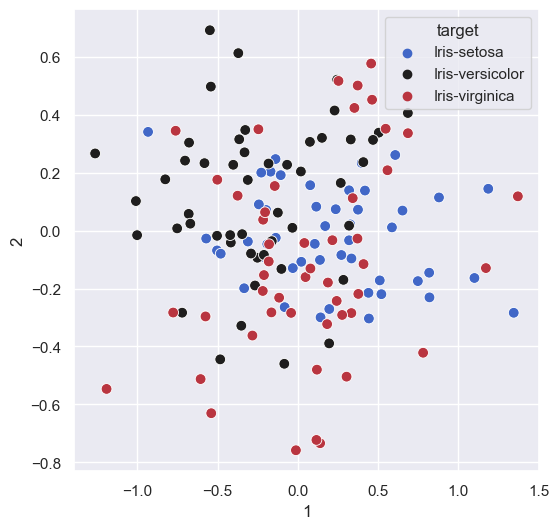

In [57]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 1,y = 2 , hue = 'target' , s = 60 , palette= 'icefire')